In [ ]:
!pip install numpy matplotlib scipy pillow

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Work

In [2]:
dataset = {"path": "/data/gallery/", "img_path": "images/", "patch_path": "patches/", "mnt_path": "mnts/"}
def select_data(individual:str, dataset:dict) -> dict:
    data = dataset.copy()
    data["individual"] = individual
    return data

In [16]:
def imshow_sample(ax:plt.Axes, data:dict):
    img_path = data["path"] + data["img_path"] + data["individual"] + ".png"
    image = Image.open(img_path)
    ax.imshow(image, cmap='gray')
    
def zoom_minutia(minutia_no:int, x:int, y:int, ax:plt.Axes, data:dict):
    img_path = data["path"] + data["patch_path"] + data["individual"] + f"_p{minutia_no}.png"
    patch = Image.open(img_path)
    patch = patch.resize((int(patch.width * .5), int(patch.height * .5)))
    
    region_locator = [x-20, x+20], [y-20, y+20]
    inset_axes_bounds = [x+80, y-100, 80, 80] # x, y, w, h
    axins = ax.inset_axes(inset_axes_bounds, transform=ax.transData, xticklabels=[], yticklabels=[], xlim=region_locator[0], ylim=region_locator[1])
    
    zoomed_bounds = [x-80, x+80, y-80, y+80]
    axins.imshow(patch, extent=zoomed_bounds, cmap='gray')
    for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(2)
    axins.plot(0.5, 0.5, 'rx', transform=axins.transAxes)

    ax.indicate_inset_zoom(axins, alpha=1, lw=2, edgecolor="red")

def get_minutiaXYR(mnt_lines:list, minutia_no:int) -> tuple[int, int, int]:
    # X, Y coordinates and R rotation angle
    line = mnt_lines[2 + minutia_no]
    x, y, theta, score = map(float, line.split())
    return x, y, theta

def mark_minutia(mnt_lines:list, minutia_no:int, ax:plt.Axes, data:dict, dir_field:bool = False, zoom:bool = False, rotConv:int = 1):
    x, y, theta = get_minutiaXYR(mnt_lines, minutia_no)
    ax.plot(x, y, 'xr', ms=5)
    if dir_field:
        # Convenção de rotação
        if rotConv == 1:
            ax.plot([x, x + 15*np.cos(theta)], [y, y + 15*np.sin(theta)], color='r')
        elif rotConv == 2:
            ax.plot([x, x + 15*np.cos(theta)], [y, y + 15*np.sin(-theta)], color='r')
    if zoom:
        zoom_minutia(minutia_no, x, y, ax, data)

def plot_minutiae(data, **kwargs):   
    # Collect minutiae info in .mnt file
    file_path = data["path"] + data["mnt_path"] + data["individual"] + ".mnt"
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    # --- .MNT FILE ---
    # image_name
    # minutiae_count height width
    # x1 y1 theta1 score1 
    # x2 y2 theta2 score2
    # ...
    image_name = lines[0].strip()
    minutiae_count, height, width = map(int, lines[1].split())

    # Plot image, minutiae position and orientation
    fig, ax = plt.subplots(figsize=(7, 7))
    
    imshow_sample(ax, data)
    
    for i in range(minutiae_count):
        mark_minutia(lines, i, ax, data, zoom = False, **kwargs)

    ax.set_title(f"Minutiae plot for {image_name}: count {minutiae_count}", fontsize = 20)
    ax.axis('off')
    ax.set_xlim([0, width])
    ax.set_ylim([height, 0])

def plot_minutia_zoom(minutia_no: int, data: dict):
    # Collect minutiae info in .mnt file
    file_path = data["path"] + data["mnt_path"] + data["individual"] + ".mnt"
    with open(file_path, 'r') as file:
        lines = file.readlines()
    image_name = lines[0].strip()
    minutiae_count, height, width = map(int, lines[1].split())
    
    # Plot the main image
    fig, ax = plt.subplots(figsize=(7, 7))
    imshow_sample(ax, data)
    mark_minutia(lines, minutia_no, ax, data , zoom=True)
    
    ax.set_title(f"Minutiae plot for {image_name}", fontsize=20)
    ax.axis('off')
    ax.set_xlim([0, width])
    ax.set_ylim([height, 0])

def plot_minutia_compare(individuals:list[str], minutiae:list[int], dataset:dict, zoom=True):
    n = len(individuals)
    fig, ax = plt.subplots(nrows=1, ncols=n, figsize=(14, 7))
    for i in range(n):
        file_path = dataset["path"] + dataset["mnt_path"] + individuals[i] + ".mnt"
        with open(file_path, 'r') as file:
            lines = file.readlines()

        image_name = lines[0].strip()
        minutiae_count, height, width = map(int, lines[1].split())

        data = select_data(individuals[i], dataset)
        imshow_sample(ax[i], data)
        mark_minutia(lines, minutiae[i], ax[i], data, zoom=True)

        ax[i].set_title(f"Minutiae no. {minutiae[i]} for {image_name}", fontsize=10)
        ax[i].axis('off')
        ax[i].set_xlim([0, width])
        ax[i].set_ylim([height, 0])

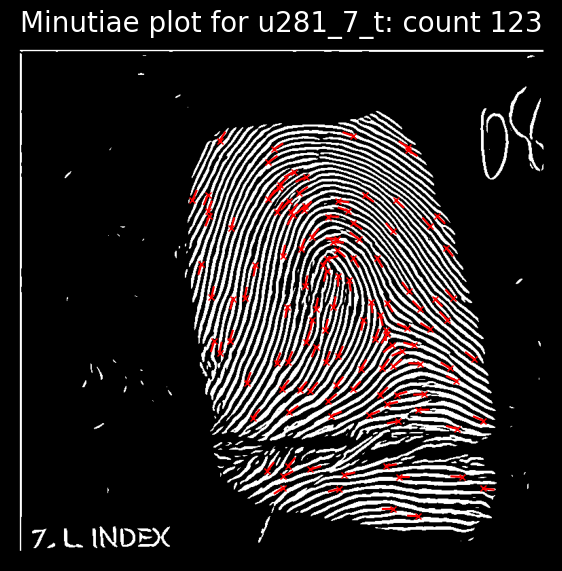

In [17]:
individual = "u2817-t"
data = select_data(individual, dataset)
plot_minutiae(data, dir_field=True)

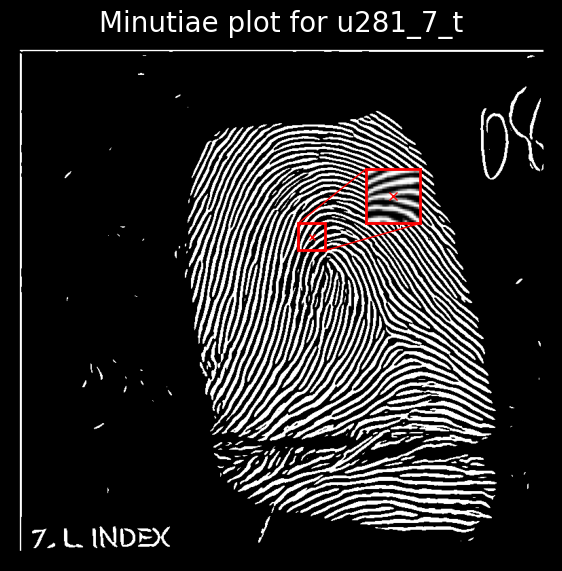

In [18]:
plot_minutia_zoom(6, data)

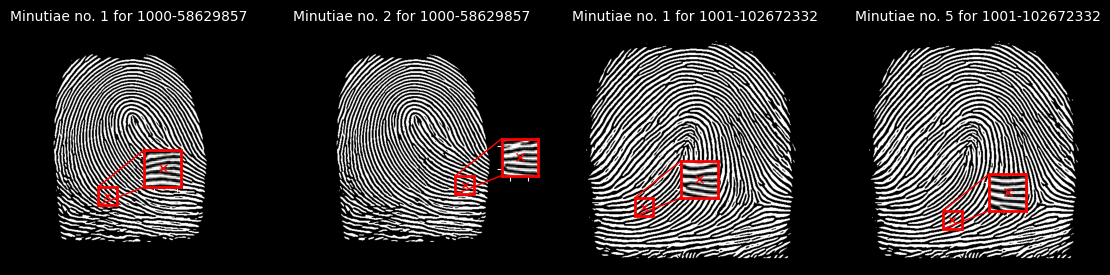

In [19]:
individuals = ["1000-58629857", "1000-58629857", "1001-102672332", "1001-102672332"]
minutiae =  [1,2,1,5]
plot_minutia_compare(individuals, minutiae, dataset, zoom=True)